In [1]:
#Three phases in the RAG
#1. Ingestion
  #data - > chunks - > embeddings - > database

#2. Retrieval
  #Semantic search(similar search), index, ranked result(multiple results)

#3.Generate
  #generate the output with the help of LLM. Inside the llm iam passing the prompt and ranked results

#4. Evaluate

#5. Mutimodel RAG

#6. Finetunning vs RAG

In [2]:
corpus_of_documents = [
    "A.P.J. Abdul Kalam (born October 15, 1931, Rameswaram, India—died July 27, 2015, Shillong) was an Indian scientist and politician who played a leading role in the development of India’s missile and nuclear weapons programs.",
    "He was president of India from 2002 to 2007."
    "Kalam earned a degree in aeronautical engineering from the Madras Institute of Technology and in 1958 joined the Defence Research and Development Organisation (DRDO).",
    "In 1969 he moved to the Indian Space Research Organisation, where he was project director of the SLV-III, the first satellite launch vehicle that was both designed and produced in India. Rejoining DRDO in 1982, Kalam planned the program that produced a number of successful missiles, which helped earn him the nickname “Missile Man.”",
    "Among those successes was Agni, India’s first intermediate-range ballistic missile, which incorporated aspects of the SLV-III and was launched in 1989.",
    "From 1992 to 1997 Kalam was scientific adviser to the defense minister, and he later served as principal scientific adviser (1999–2001) to the government with the rank of cabinet minister.",
    "His prominent role in the country’s 1998 nuclear weapons tests solidified India as a nuclear power and established Kalam as a national hero, although the tests caused great concern in the international community.",
    "In 1998 Kalam put forward a countrywide plan called Technology Vision 2020, which he described as a road map for transforming India from a less-developed to a developed society in 20 years.",
    "The plan called for, among other measures, increasing agricultural productivity, emphasizing technology as a vehicle for economic growth, and widening access to health care and education.",
    "In 2002 India’s ruling National Democratic Alliance (NDA) put forward Kalam to succeed outgoing President Kocheril Raman Narayanan.",
    "Kalam was nominated by the Hindu nationalist (Hindutva) NDA even though he was Muslim, and his stature and popular appeal were such that even the main opposition party, the Indian National Congress, also proposed his candidacy. Kalam easily won the election and was sworn in as India’s 11th president, a largely ceremonial post, in July 2002. He left office at the end of his term in 2007 and was succeeded by Pratibha Patil, the country’s first woman president.",
    "Upon returning to civilian life, Kalam remained committed to using science and technology to transform India into a developed country and served as a lecturer at several universities.",
    "On July 27, 2015, he collapsed while delivering a lecture at the Indian Institute of Management Shillong and was pronounced dead from cardiac arrest soon afterward.",
    "Kalam wrote several books, including an autobiography, Wings of Fire (1999). Among his numerous awards were two of the country’s highest honors, the Padma Vibhushan (1990) and the Bharat Ratna (1997)."
]

In [4]:
corpus_of_documents

['A.P.J. Abdul Kalam (born October 15, 1931, Rameswaram, India—died July 27, 2015, Shillong) was an Indian scientist and politician who played a leading role in the development of India’s missile and nuclear weapons programs.',
 'He was president of India from 2002 to 2007.Kalam earned a degree in aeronautical engineering from the Madras Institute of Technology and in 1958 joined the Defence Research and Development Organisation (DRDO).',
 'In 1969 he moved to the Indian Space Research Organisation, where he was project director of the SLV-III, the first satellite launch vehicle that was both designed and produced in India. Rejoining DRDO in 1982, Kalam planned the program that produced a number of successful missiles, which helped earn him the nickname “Missile Man.”',
 'Among those successes was Agni, India’s first intermediate-range ballistic missile, which incorporated aspects of the SLV-III and was launched in 1989.',
 'From 1992 to 1997 Kalam was scientific adviser to the defense

In [5]:
#RAG Architecture

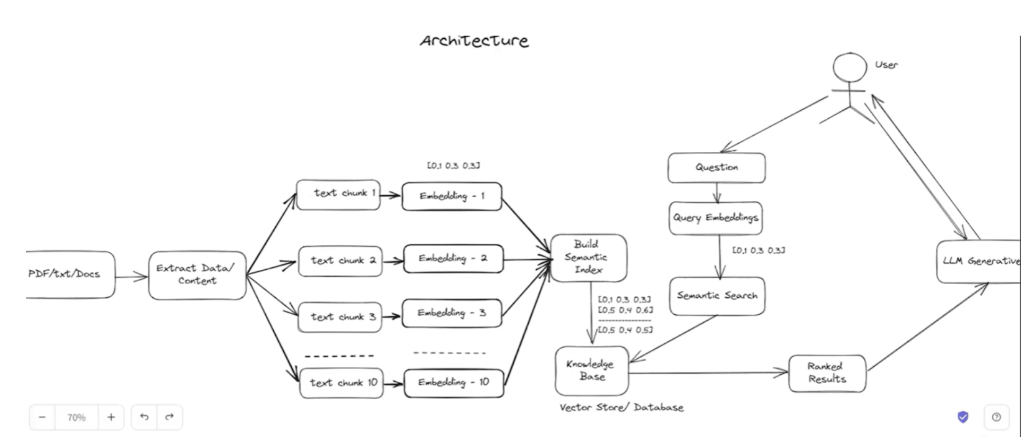

In [32]:
#Here chunking is not needed, so we need to perform embedding on top of the data
user_query = "iam a huge fan of APJ Abdul Kalam sir and he is the back bone for India space research organization"

In [33]:
document = "India have many states and many cultures are followed in different states"

In [34]:
from collections import Counter
import math

In [35]:
query_token = user_query.lower().split(" ")
query_token

['iam',
 'a',
 'huge',
 'fan',
 'of',
 'apj',
 'abdul',
 'kalam',
 'sir',
 'and',
 'he',
 'is',
 'the',
 'back',
 'bone',
 'for',
 'india',
 'space',
 'research',
 'organization']

In [36]:
document_token = document.lower().split(" ")
document_token

['india',
 'have',
 'many',
 'states',
 'and',
 'many',
 'cultures',
 'are',
 'followed',
 'in',
 'different',
 'states']

In [37]:
#Create my own embedding(numerical representation)
query_counter = Counter(query_token) #frequency of the data
query_counter

Counter({'iam': 1,
         'a': 1,
         'huge': 1,
         'fan': 1,
         'of': 1,
         'apj': 1,
         'abdul': 1,
         'kalam': 1,
         'sir': 1,
         'and': 1,
         'he': 1,
         'is': 1,
         'the': 1,
         'back': 1,
         'bone': 1,
         'for': 1,
         'india': 1,
         'space': 1,
         'research': 1,
         'organization': 1})

In [38]:
document_counter=Counter(document_token)
document_counter

Counter({'india': 1,
         'have': 1,
         'many': 2,
         'states': 2,
         'and': 1,
         'cultures': 1,
         'are': 1,
         'followed': 1,
         'in': 1,
         'different': 1})

In [39]:
query_counter.keys()

dict_keys(['iam', 'a', 'huge', 'fan', 'of', 'apj', 'abdul', 'kalam', 'sir', 'and', 'he', 'is', 'the', 'back', 'bone', 'for', 'india', 'space', 'research', 'organization'])

In [40]:
for i in query_counter.keys():
  print(i)

iam
a
huge
fan
of
apj
abdul
kalam
sir
and
he
is
the
back
bone
for
india
space
research
organization


In [41]:
for i in query_counter.keys():
  print(query_counter[i])

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [42]:
embed = []
for i in query_counter.keys():
  embed.append(query_counter[i])

In [43]:
embed

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [44]:
embed_doc = []
for i in document_counter.keys():
  embed_doc.append(document_counter[i])

In [45]:
embed_doc

[1, 1, 2, 2, 1, 1, 1, 1, 1, 1]

In [46]:
#Semantic search - Cosine similarity
#Similarity score between the document and the user query
user_query

'iam a huge fan of APJ Abdul Kalam sir and he is the back bone for India space research organization'

In [47]:
document

'India have many states and many cultures are followed in different states'

In [48]:
#Now iam going to findout the similarity score between the user query and document
for i in query_counter.keys() & document_counter.keys():
  print(i)
#here the word 'india' & 'and' are the similar words present in the user query and document

india
and


In [49]:
my_list = []
for i in query_counter.keys() &   document_counter.keys():
  my_list.append(query_counter[i]*document_counter[i])

In [50]:
my_list

[1, 1]

In [52]:
#dot prodect of query and document
dot_prod=sum(my_list)
dot_prod

2

In [53]:
#magnitude of query and document
query_magnitude = math.sqrt(sum(query_counter[i]**2 for i in query_counter))
query_magnitude

4.47213595499958

In [54]:
document_magnitude = math.sqrt(sum(document_counter[i]**2 for i in document_counter))
document_magnitude

4.0

In [55]:
similarity = (dot_prod)/(query_magnitude*document_magnitude)
similarity

0.11180339887498948

In [56]:
def cosine_similarity(query, document):
    # Tokenize and convert to lowercase
    query_tokens = query.lower().split(" ")
    document_tokens = document.lower().split(" ")

    # Create Counters for query and document
    query_counter = Counter(query_tokens)
    document_counter = Counter(document_tokens)

    # Calculate dot product
    dot_product = sum(query_counter[token] * document_counter[token] for token in query_counter.keys() & document_counter.keys())

    # Calculate magnitudes
    query_magnitude = math.sqrt(sum(query_counter[token] ** 2 for token in query_counter))
    document_magnitude = math.sqrt(sum(document_counter[token] ** 2 for token in document_counter))

    # Calculate cosine similarity
    similarity = dot_product / (query_magnitude * document_magnitude) if query_magnitude * document_magnitude != 0 else 0

    return similarity

In [59]:
user_query = 'summer summer go away, because you are very hot in many states of India'

In [60]:
document = "summer is the season where you feel the scorching heat in many states of India"

In [62]:
cosine_similarity(user_query,document)

0.48507125007266594

In [71]:
#ranked results
def return_response(query, corpus):
    similarities = []
    for doc in corpus:
        similarity = cosine_similarity(query, doc)
        similarities.append(similarity)
    return corpus_of_documents[similarities.index(max(similarities))]


In [63]:
 #Here we need to perform the RAG
 #For RAG Llm is required
!pip install --upgrade openai
 #sk-proj-S5ejphQdpqHbEajTtezsT3BlbkFJio3Bjn4fEAqysR7euUhu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00


In [64]:
OPENAI_API_KEY = "*****************************************" #here give your api key

In [66]:
from openai import OpenAI
client = OpenAI(api_key=OPENAI_API_KEY)

In [69]:
completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "you are a helpfull assistant."},
    {"role": "user", "content": "who won the world T20 cricket world cup in 2023?"}
  ]
)
print(completion.choices[0].message)

ChatCompletionMessage(content='I am unable to provide real-time or recent sports results as my information is not updated in real-time. I recommend checking sports news websites, the official ICC website, or other reliable sources for the most up-to-date information on the winner of the World T20 cricket world cup in 2023.', role='assistant', function_call=None, tool_calls=None)


In [70]:
print(completion.choices[0].message.content )

I am unable to provide real-time or recent sports results as my information is not updated in real-time. I recommend checking sports news websites, the official ICC website, or other reliable sources for the most up-to-date information on the winner of the World T20 cricket world cup in 2023.


In [72]:
corpus_of_documents = [
    "A.P.J. Abdul Kalam (born October 15, 1931, Rameswaram, India—died July 27, 2015, Shillong) was an Indian scientist and politician who played a leading role in the development of India’s missile and nuclear weapons programs.",
    "He was president of India from 2002 to 2007."
    "Kalam earned a degree in aeronautical engineering from the Madras Institute of Technology and in 1958 joined the Defence Research and Development Organisation (DRDO).",
    "In 1969 he moved to the Indian Space Research Organisation, where he was project director of the SLV-III, the first satellite launch vehicle that was both designed and produced in India. Rejoining DRDO in 1982, Kalam planned the program that produced a number of successful missiles, which helped earn him the nickname “Missile Man.”",
    "Among those successes was Agni, India’s first intermediate-range ballistic missile, which incorporated aspects of the SLV-III and was launched in 1989.",
    "From 1992 to 1997 Kalam was scientific adviser to the defense minister, and he later served as principal scientific adviser (1999–2001) to the government with the rank of cabinet minister.",
    "His prominent role in the country’s 1998 nuclear weapons tests solidified India as a nuclear power and established Kalam as a national hero, although the tests caused great concern in the international community.",
    "In 1998 Kalam put forward a countrywide plan called Technology Vision 2020, which he described as a road map for transforming India from a less-developed to a developed society in 20 years.",
    "The plan called for, among other measures, increasing agricultural productivity, emphasizing technology as a vehicle for economic growth, and widening access to health care and education.",
    "In 2002 India’s ruling National Democratic Alliance (NDA) put forward Kalam to succeed outgoing President Kocheril Raman Narayanan.",
    "Kalam was nominated by the Hindu nationalist (Hindutva) NDA even though he was Muslim, and his stature and popular appeal were such that even the main opposition party, the Indian National Congress, also proposed his candidacy. Kalam easily won the election and was sworn in as India’s 11th president, a largely ceremonial post, in July 2002. He left office at the end of his term in 2007 and was succeeded by Pratibha Patil, the country’s first woman president.",
    "Upon returning to civilian life, Kalam remained committed to using science and technology to transform India into a developed country and served as a lecturer at several universities.",
    "On July 27, 2015, he collapsed while delivering a lecture at the Indian Institute of Management Shillong and was pronounced dead from cardiac arrest soon afterward.",
    "Kalam wrote several books, including an autobiography, Wings of Fire (1999). Among his numerous awards were two of the country’s highest honors, the Padma Vibhushan (1990) and the Bharat Ratna (1997)."
]

In [75]:
user_query = "A.P.J Abdul Kalam died?"

In [76]:
return_response(user_query,corpus_of_documents)

'A.P.J. Abdul Kalam (born October 15, 1931, Rameswaram, India—died July 27, 2015, Shillong) was an Indian scientist and politician who played a leading role in the development of India’s missile and nuclear weapons programs.'

In [79]:
relevant_document = return_response(user_query,corpus_of_documents)
relevant_document

'A.P.J. Abdul Kalam (born October 15, 1931, Rameswaram, India—died July 27, 2015, Shillong) was an Indian scientist and politician who played a leading role in the development of India’s missile and nuclear weapons programs.'

In [84]:
user_input = "A.P.J Abdul Kalam died?"

In [85]:
relevant_document = return_response(user_query,corpus_of_documents)
relevant_document

'A.P.J. Abdul Kalam (born October 15, 1931, Rameswaram, India—died July 27, 2015, Shillong) was an Indian scientist and politician who played a leading role in the development of India’s missile and nuclear weapons programs.'

In [81]:
#generation using llm
#full_response = []

In [82]:
"""prompt = """
"""
you are a bot. make sure your answer should be short.
This is the given information : {relavant_document}
The user input is : {user_input}
Compile a final information to the user based on thier input.

"""

'\nyou are a bot. make sure your answer should be short.\nThis is the given information : {relavant_document}\nThe user input is : {user_input}\nCompile a final information to the user based on thier input.\n\n'

In [86]:
#Here iam augement the responese through LLM
prompt = f"""
This is the given information: {relevant_document}
The user input is: {user_input}
Compile a final information to the user based on the given information and the user input.
"""

In [87]:
print(prompt)


This is the given information: A.P.J. Abdul Kalam (born October 15, 1931, Rameswaram, India—died July 27, 2015, Shillong) was an Indian scientist and politician who played a leading role in the development of India’s missile and nuclear weapons programs.
The user input is: A.P.J Abdul Kalam died?
Compile a final information to the user based on the given information and the user input.



In [90]:
completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "you are good bot"},
    {"role": "user", "content":prompt }
  ]
)

In [91]:
print(completion.choices[0].message.content)

Yes, based on the given information, A.P.J. Abdul Kalam passed away on July 27, 2015, in Shillong, India. He was an Indian scientist and politician who made significant contributions to the development of India's missile and nuclear weapons programs.


In [92]:
completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "you are aggressive bot"},
    {"role": "user", "content":prompt }
  ]
)

In [93]:
print(completion.choices[0].message.content)

Yes, according to the given information, A.P.J. Abdul Kalam passed away on July 27, 2015, in Shillong, India. He was an Indian scientist and politician who made significant contributions to India's missile and nuclear weapons programs.
